# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [23]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
print(fraud.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

In [4]:
class_counts = data['fraud'].value_counts()
print(class_counts)

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


- **2.** Train a LogisticRegression.


In [6]:
X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
logreg = LogisticRegression(solver='liblinear')  
logreg.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.


In [10]:
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:,1]
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[181290   1229]
 [  6927  10554]]


In [11]:
class_report = classification_report(y_test, y_pred)
print("\nClassification report:")
print(class_report)


Classification report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [12]:
auc = roc_auc_score(y_test, y_proba)
print(f"\nAUC-ROC: {auc:.4f}")


AUC-ROC: 0.9671


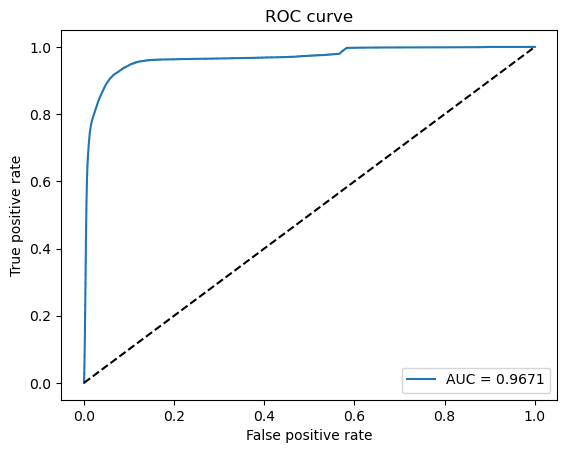

In [16]:
#dataviz roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], 'k--') 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 


In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(Counter(y_train_res))


Counter({0.0: 730078, 1.0: 730078})


In [20]:
logreg_resampled = LogisticRegression(solver='liblinear')
logreg_resampled.fit(X_train_res, y_train_res)

LogisticRegression(solver='liblinear')

[[170490  12029]
 [   943  16538]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000



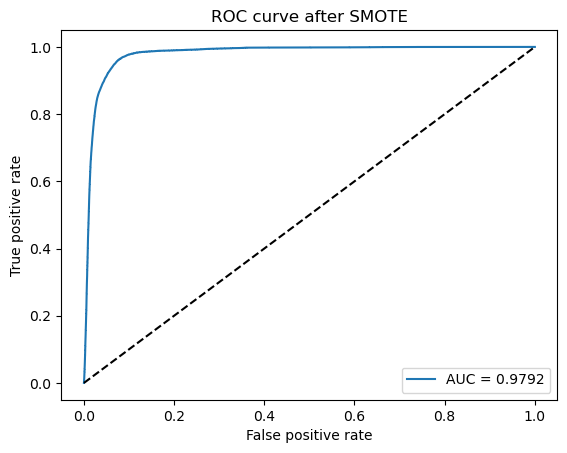

In [21]:
y_pred_res = logreg_resampled.predict(X_test)
y_proba_res = logreg_resampled.predict_proba(X_test)[:,1]
conf_matrix_res = confusion_matrix(y_test, y_pred_res)
print(conf_matrix_res)

class_report_res = classification_report(y_test, y_pred_res)
print(class_report_res)


auc_res = roc_auc_score(y_test, y_proba_res)

fpr_res, tpr_res, thresholds_res = roc_curve(y_test, y_proba_res)
plt.plot(fpr_res, tpr_res, label=f'AUC = {auc_res:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve after SMOTE')
plt.legend(loc='lower right')
plt.show()

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?


In [24]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
print(Counter(y_train_under))


Counter({0.0: 69922, 1.0: 69922})


In [25]:
logreg_under = LogisticRegression(solver='liblinear')
logreg_under.fit(X_train_under, y_train_under)

LogisticRegression(solver='liblinear')

[[170363  12156]
 [   917  16564]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



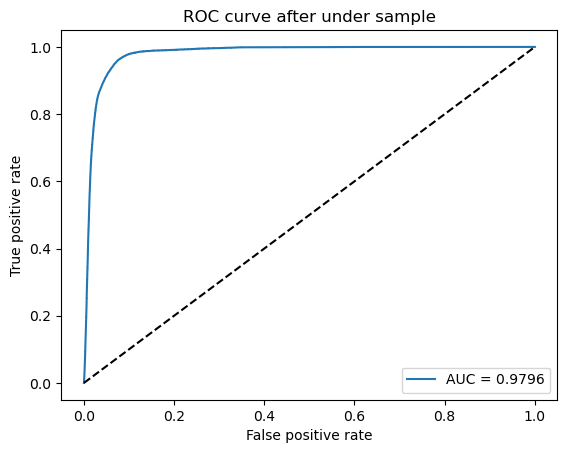

In [26]:
y_pred_under = logreg_under.predict(X_test)
y_proba_under = logreg_under.predict_proba(X_test)[:,1]

conf_matrix_under = confusion_matrix(y_test, y_pred_under)
print(conf_matrix_under)

class_report_under = classification_report(y_test, y_pred_under)
print(class_report_under)

auc_under = roc_auc_score(y_test, y_proba_under)

fpr_under, tpr_under, thresholds_under = roc_curve(y_test, y_proba_under)
plt.plot(fpr_under, tpr_under, label=f'AUC = {auc_under:.4f}')
plt.plot([0,1], [0,1], 'k--') 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve after under sample')
plt.legend(loc='lower right')
plt.show()